# 1.Importing the modules

In [4]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
sns.set_style('whitegrid')
%matplotlib inline

In [19]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [20]:
#reading the dataset
data = pd.read_csv('boston.csv')
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape)) #no of dataset

Boston housing dataset has 506 data points with 16 variables each.


In [21]:
data.info() #to get the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   TRACT    506 non-null    int64  
 2   LON      506 non-null    float64
 3   LAT      506 non-null    float64
 4   MEDV     506 non-null    float64
 5   CRIM     506 non-null    float64
 6   ZN       506 non-null    float64
 7   INDUS    506 non-null    float64
 8   CHAS     506 non-null    int64  
 9   NOX      506 non-null    float64
 10  RM       506 non-null    float64
 11  AGE      506 non-null    float64
 12  DIS      506 non-null    float64
 13  RAD      506 non-null    int64  
 14  TAX      506 non-null    int64  
 15  PTRATIO  506 non-null    float64
dtypes: float64(11), int64(4), object(1)
memory usage: 63.4+ KB


In [22]:
data.head() # See head of the dataset

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [23]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

ValueError: Length mismatch: Expected axis has 16 elements, new values have 13 elements

# 2. Adding target variable to dataframe

In [16]:
#Adding target variable to dataframe
data['boston'] = data.target 
# Median value of owner-occupied homes in $1000s

AttributeError: 'DataFrame' object has no attribute 'target'

In [34]:
data.columns #the columns title

Index(['TOWN', 'TRACT', 'LON', 'LAT', 'MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS',
       'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'],
      dtype='object')

In [10]:
# Identifying the unique number of values in the dataset
data.nunique()

TOWN        92
TRACT      506
LON        375
LAT        376
MEDV       228
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
dtype: int64

C:\Users\hi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


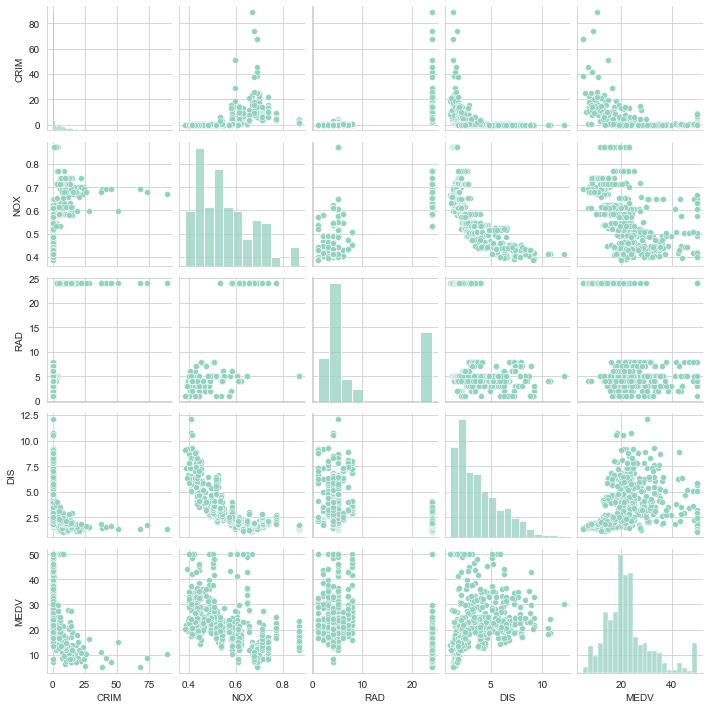

In [37]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.pairplot(data,size = 2,vars = ['CRIM','NOX','RAD','DIS','MEDV'])

<AxesSubplot:>

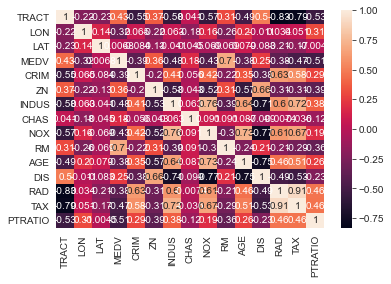

In [38]:
sns.heatmap(data.corr(),annot=True)

In [39]:
data.corr()

,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
TRACT,1.000000,-0.220890,-0.225543,0.428252,-0.547165,0.367292,-0.575705,0.041356,-0.569807,0.305207,-0.487465,0.496841,-0.828829,-0.793602,-0.532678
LON,-0.220890,1.000000,0.143054,-0.322947,0.065101,-0.218081,0.062702,-0.175619,0.160871,-0.257110,0.204739,-0.011243,0.034067,0.050663,0.312602
LAT,-0.225543,0.143054,1.000000,0.006826,-0.084293,-0.129667,-0.041093,-0.044726,-0.068600,-0.069317,0.079035,-0.082981,-0.207013,-0.167718,-0.004527
MEDV,0.428252,-0.322947,0.006826,1.000000,-0.389582,0.360386,-0.484754,0.175663,-0.429300,0.696304,-0.377999,0.249315,-0.384766,-0.471979,-0.505655
CRIM,-0.547165,0.065101,-0.084293,-0.389582,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946
ZN,0.367292,-0.218081,-0.129667,0.360386,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679
INDUS,-0.575705,0.062702,-0.041093,-0.484754,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248
CHAS,0.041356,-0.175619,-0.044726,0.175663,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515
NOX,-0.569807,0.160871,-0.068600,-0.429300,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933
RM,0.305207,-0.257110,-0.069317,0.696304,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501


In [13]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [71]:
print(lm.intercept_)

28.547769778627952


In [72]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.170335
ZN,0.039893
INDUS,-0.095109
CHAS,2.431655
NOX,-22.498404
RM,5.762281
AGE,-0.042962
DIS,-1.577240
RAD,0.028790
PTRATIO,-1.092756


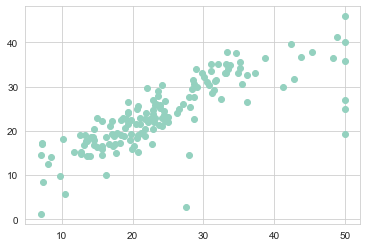

In [74]:
Predictions = lm.predict(X_test)
# Let's check through a scatter plot how they are aligned
plt.scatter(y_test,Predictions)

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

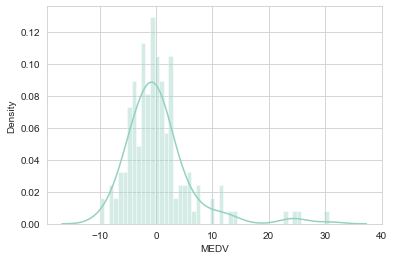

In [75]:
#residual Histogram
sns.distplot((y_test-Predictions),bins=50)

In [12]:
# Model prediction on train data
y_pred = lm.predict(X_train)

NameError: name 'lm' is not defined

In [76]:
#Regression Evaluation Metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, Predictions))
print('MSE:', metrics.mean_squared_error(y_test, Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predictions)))

MAE: 3.926130637590449
MSE: 36.80775786272037
RMSE: 6.066939744444507


In [11]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

NameError: name 'y_train' is not defined